<a href="https://colab.research.google.com/github/pattangeumdduck/stack_study_record/blob/main/aice_professionalstudy9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (합성곱 신경망)
- DNN은 이미지 처리 과정에서 너무 많은 파라미터 발생함...
- 이미지크기가 커지거나 은닉층 증가시 파라미터가 비약적증가 -> 현실적으로 학습 불가능
- 일렬로 Flatten해서 학습하므로 위치 정보(topology)를 잃게 됨 -> 글자의 크기가 달라지거나 변형이 생기면 다른 데이터로 인식하여 학습 저해
-  

# 컨볼루션 필터
- 영상의 특징을 분석하기 위해서 픽셀 단위가 아닌 픽셀들이 이루는 상관성 패턴 분석에 활용되며
- 영상과 같은 행렬의 지역 상관성(Locality)을 파악하는데 사용됨
- 컨볼루션 필터는 가중치 공간 필터로, 가중치 값에 따라 다양한 영상 처리가 가능하며 모델 학습시 가중치(weight) 학습. --> 이러한 컨볼루션 필터를 이용해서 이미지 특징을 파악할 수 있음.(ex; sobel filter이용해 에지 부분 패턴 추출)

#필터의 다양한 이름
- Filter : 영상으로부터 불필요한 정보를 제거 및 원하는 정보 얻기
- 학습 파라미터 :주어진 이미지 특징을 파악하기 위함
- kernel : 동일한 사이즈의 영상 패치를 하나의 값으로 치환

# CNN(Convolutional Neuran Network)
- 올바른 컨볼루션 필터의 가중치를 선택하는 것이 중요
 -> 이미지 특징을 잘 파악할 수 있기 떄문
- 어떻게 최적의 가중치(weight)를 찾을 수 있는가?
  -> CNN모델
- CNNN은 이미지에 Filter를 거쳐서 이미지 feature map 생성 -> 이후 분류

#CNN 의 구조
- Convoutional Layer(filtering)와 Pooling Layer, FCN(Fully Connected Network, c최종 결과값 처리)로 구성

#Filter & Stride
입력 데이터가 여러 채널을 가질경우
- 채널별로 다른 필터로 각 채널을 순회하며 합성곱을 계산한 후, 채널별 피처 맵으 ㄹ만들고, 각 채널의 피처 맺을 합산하여 최종 피처 맵으로 반환
- 결국, 입력 데이터는 채널 수가 몇개라도 1개의 피처 맵 생성

#패딩 (합성곱 레이어)
- Filter 와 Stride의 작용으로 Feature Map 크기는 입력 데이터보다 작음
- 합성곱 레이어의 출력데이터가 줄어드는 것을 방지하는 방법이 패딩으로, 입력 데이터의 외곽에 0으로 채워 넣는 것을 의미

#풀링 레이어
- 출력 데이터의 크기를 줄이고 특정 데이터를 강조하는 용도로 사용됨
- 계산량, 메모리 사용량, 파라미터 수를 줄이기 위해 입력 이미지의 subsampling(축소본)을 만드는 것.
- 크기를 줄여 이미지 출소본을 만들지만 그대로 주요 특징 보유, 단 Channel크기를 그대로 유지

- 피처맵 사이즈 계산 (H -K)/ S+ 1  H;height, K :kernel, S:stride
- 컨볼루션 연산
 -> Conv2D(filters, kernel_size, strides=(1,1), padding='valid', activation='relu')
 -> 학습에 필요한 Filter크기는 : Kernel * Kernel * Din(1개의 feature map) * Dout
(Filters  개수 -> 최종 featuremap 갯수)

#Fully Connected Network


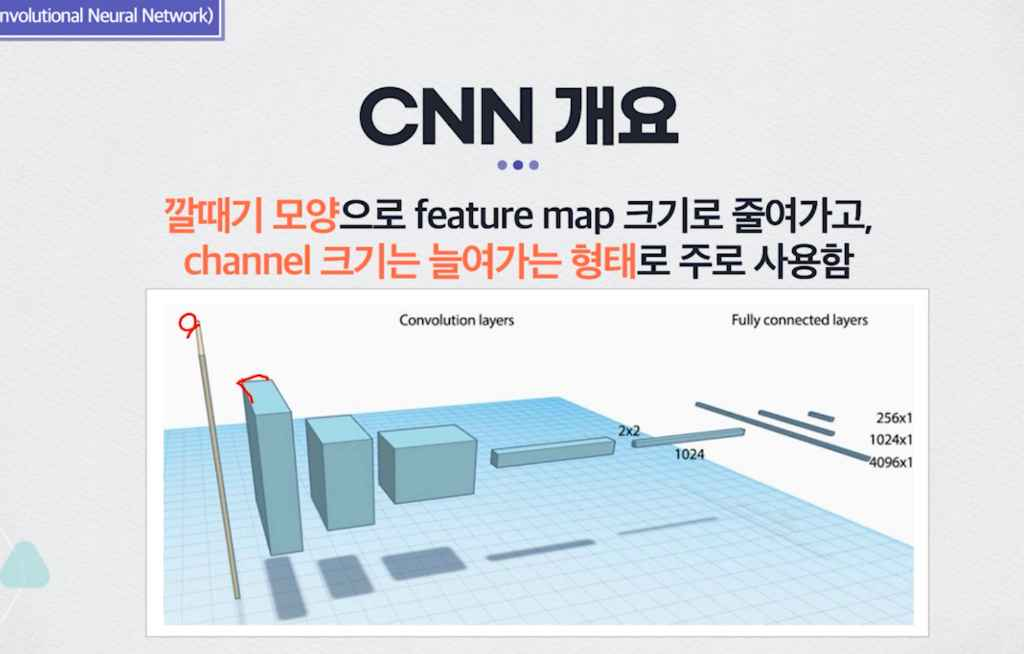

#CNN 이용하여 MNIST 분류하기
- Keras Datasets MNIST 활용하여
- CNN 모델 구성하고 CNN layer접근 및 가중치 확인
- 또한, FCNN모델보다 CNN이 더 좋은 성능을 내는지 확인

<학습 목차>
 1. import modules
 2. 데이터 불러오기 : Keras MNIST활용
 3. CNN 모델 구성
 4. Model Compile
 5. 학습 수행 : model.fit, EarlyStopping, ModelCheckpoint(컴퓨팅 자원을 위해)
 6. 학습 결과 테스트: model.evaluate
 7. 성능 그래프
 8. 실전 테스트 : 손글씨 입력해서 분류 잘 하는지 보기.


In [8]:
#import modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [9]:
#데이터 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
#3차원 배열
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [12]:
#CNN 모델 구성 : (4차원) Batch * Height * Width * Channel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [13]:
# 28 * 28 shape를 CNN모델에 입력으로 주기 위해 28*28*1 shape 변경 : 채널 추가
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train[...,tf.newaxis]
x_test = x_test[...,tf.newaxis]
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3),strides=(1,1),padding = 'same', activation='relu', input_shape=(28,28,1))) # 28 * 28 * 32
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2))) #14 * 14 * 32
model.add(Conv2D(64,(2,2) , activation = 'relu', padding = 'same')) #14 * 14 * 64
model.add(MaxPooling2D(pool_size = (2,2))) # 7 * 7 * 64
model.add(Dropout(0.2))
model.add(Flatten()) #3136
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,402 (1.57 MB)

 Trainable params: 411,402 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#모델의 각 레이어 접근 : 전이학습 할때 모델의 필요한 부분을가져와야 하므로 모델의 각 레이어에 접근할 수 있어야 함.
model.input

AttributeError: The layer sequential_2 has never been called and thus has no defined input.

In [ ]:
model.output #모델 출력
model.layers #모델 레이어들 : 리스트 구성
model.layers[0] #첫 번째 레이어 Conv2D
model.layers[0].input #input shape은?



In [ ]:
#모델 첫 번쨰 레이어 Conv2D의 커널 가중치 계산
# 1) shape=(5, 5, 1, 32) 의미: 5 * 5 커널에 대해 input 채널 1개, output 채널 32개 (FeatureMap) --> 5 * 5* 1*32 크기의 파라미터
# 2) shape=(32,)의미 :32개 출력 bias 파라미터

#첫 번째 Conv2D 레이어는 800 + 32 = 832 파라미터 생성
model.layers[0].weight

In [ ]:
#레이어를 이름으로도 접근 가능
model.get_layer('conv2d') #conv2d 레이어 이름으로 접근

In [ ]:
#모델 컴파일
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)  #

In [1]:
y_train.shape, y_test.shape

NameError: name 'y_train' is not defined

In [2]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

NameError: name 'model' is not defined

In [3]:
#학습 수행
EPOCHS =5
BATCH_SIZE =1024

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
es = EarlyStopping(monitor='val_loss', patience=4, mode = 'min', verbose =1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode ='max', save_best_only=True, verbose=1)

In [ ]:
history = model.fit(x_train, y_train , epochs = EPOCHS, batch_size = BBATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

In [ ]:
#학습 결과 테스트
model.evaluate(x_test, y_test)

In [7]:
from ast import increment_lineno
#성능그래프
import matplotlib.pyplot as plt
%matplotlib inline
x_range = range(1, len(history.historu['accuracy']) + 1)

NameError: name 'history' is not defined

NameError: name 'x_range' is not defined

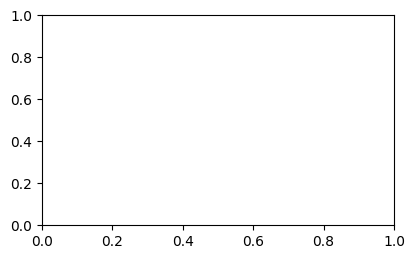

In [8]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(x_range, history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#실전 테스트
#3차원 이미지
x_test[0].shape

In [ ]:
n = 0
plt.imshow(x_test[n].reshape(28,28), cmap = 'gray')
plt.show()

pred = model.predict(x_test[n].reshape(1,28,28,1))
answer = np.argmax(pred, axis =1)

print('Prediction Probability :', pred)
print('The Answer is ', answer)

# 배운 내용 정리
1. Keras 손글씨 MNIST 데이터셋 활용
2. CNN모델 구성 : 이전 실습 FCNN보다는 약간의 성능향상 있었음
3. CNN 모델의 layer 접근해보고 가중치 계산 수행
4. FCNN 모델보다 CNN 모델의 성능이 좀 더 우수한걸 확인해 봄
5. FCNN 모델의 경우, 이미지를 Flatten해서 1차원을 만들어 위치 정보를 잃어 버리고
6. 이미지 사이즈가 커지고 복잡해지면 FCNN보다는 CNN 성능이 잘 나오므로 적극 활용필요

# Functional API 이용하여 CNN 모델 구성 및 MNIST 분류하기
- Fucntional API 이용하여 CNN 모델링
- 기존 Sequential 모델로는 여러개의 입력, 여러 개의 출력을 구현하기 어려움
- 여러 개 입력과 출력이 되는 복잡한 모델을 구성하려면 반드시 Functional API 사용해야 함
- 추가로, Functioal API 활용하여 중간 컨볼루션 레이어의 피쳐맵 결과값을 이미지로 보여주는 모델 만들오봄

- 참고 사이트:Functional API
 - https://keras.io/guides/functional_api/
 - https://wikidocs.net/38861

#학습 목차
 1. import modeules
 2. 데이터 불러오기 :Keras dataset MNIST 활용
 3. Functional API CNN모델 구성
 4. 모델 컴파일 : model.compile
 5. 학습 수행 :model.fit, EarlyStopping, ModelCheckpoint
 6. 학습 결과 테스트 : model.evaluate
 7. 성능그래프
 8. 실전 테스트
 9. 추기: Functional API 이용해 중간 컨볼루션 레이어의 Feature map 결과값을
이미지로 보여주는 모델 생성


In [3]:
#import modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#데이터 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
#

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape, x_test.shape
y_train.shape, y_test.shape

((60000,), (10000,))

In [6]:
#Functional API CNN 모델 구성 :(4차원) Batch * Height * Width * Channel
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input

In [7]:
#28* 28shape를 CNN 모델에 입력값으로 주기 위해 28* 28* 1 shape 병경: 채널추가
#x_train = x_train[...,tf.newaxis]
# x_test = x_test[..., tf.newaxis]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
#Sequential 모델 하기
#model = Sequential
# model.add(Conv2D(32, kernel_size = (5,5), strides =(1,1), padding ='same'
#                   activation = 'relu', input_shape(28,28,1)))
#model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
#model.add(Conv2D(64,(2,2), activation ='relu', padding ='same'))
# model.add(MaxPlooing2D(pool_size = (2,2)))
# model.add(Dropout(0.2))
# model.add(Faltten())
# model.add(Dense(128, activation ='relu'))
#model.add(Dropout(0.3))
# model.add(Dense(10,activation ='softmax'))

#Functional API 모델링하기
inputs = Input(shape=(28,28,1))
conv1 = Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation ='relu')(inputs) #28 * 28 * 32
pool1 = MaxPooling2D(pool_size = (2,2), strides = (2,2))(conv1) # 14 * 14 * 32

conv2 = Conv2D(filters = 64, kernel_size= (2,2), padding='same', activation ='relu')(pool1) #14 * 14 * 64
pool2 = MaxPooling2D(pool_size = (2,2), strides = (2,2))(conv2) # 7 * 7 * 64

drop2 = Dropout(0.2)(pool2)
flat3 = Flatten()(drop2)
dense4 = Dense(128, activation = 'relu')(flat3)
drop4 = Dropout(0.3)(dense4)
outputs = Dense(10, activation = 'softmax')(drop4)

model = Model(inputs = inputs, outputs = outputs)



In [ ]:
#모델 컴파일
#Y 레이블 원 핫 인코딩 하지 않기
# from tensorflow.keras.utils import to categorical
# y_train = to_categorical(y_train, numclasses=10)
#y_test = to_categorical(y_test, num_classes =10)

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [11]:
# Y 레이블 원핫인코딩 내부덕으로 수행하도록 loss = 'sparse_categorical_crossentropy' 설정하기

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,914 (1.57 MB)

 Trainable params: 411,914 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#학습 수행
EPOCHS = 5
BATCH_SIZE =1024
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', patience =4, mode = 'min', verbose =1)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose =1)

In [13]:
history = model.fit(x_train, y_train, epochs =EPOCHS, batch_size =BATCH_SIZE, callbacks = [es, mc], validation_data = (x_test, y_test))

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6283 - loss: 1.2844
Epoch 1: val_accuracy improved from -inf to 0.94530, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6310 - loss: 1.2753 - val_accuracy: 0.9453 - val_loss: 0.1813
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9390 - loss: 0.2032
Epoch 2: val_accuracy improved from 0.94530 to 0.96930, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9391 - loss: 0.2027 - val_accuracy: 0.9693 - val_loss: 0.0928
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9644 - loss: 0.1183
Epoch 3: val_accuracy improved from 0.96930 to 0.98060, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9644 - loss: 0.1182 - val_accuracy: 0.9806 - val_loss: 0.0611
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9729 - loss: 0.0904
Epoch 4: val_accuracy improved from 0.98060 to 0.98450, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9729 - loss: 0.0903 - val_accuracy: 0.9845 - val_loss: 0.0475
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9794 - loss: 0.0704
Epoch 5: val_accuracy improved from 0.98450 to 0.98520, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9794 - loss: 0.0704 - val_accuracy: 0.9852 - val_loss: 0.0443


In [14]:
#학습결과 테스트
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0517


[0.04427298903465271, 0.9851999878883362]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
x_range = range(1, len(history.history['accuracy']) + 1)

In [18]:
#실전 테스트
x_test[0].shape

(28, 28, 1)

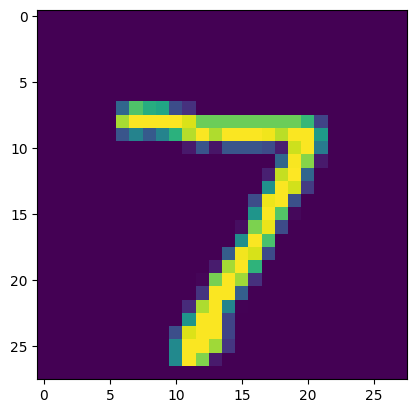

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction Probability : [[6.65648656e-08 4.51234229e-07 1.48535935e-06 4.72336906e-05
  6.31427488e-09 3.29587202e-08 2.46531101e-10 9.99937296e-01
  7.46341797e-08 1.33667545e-05]]
The Answer is  [7]


In [19]:
n = 0
plt.imshow(x_test[n].reshape(28,28))
plt.show()

pred = model.predict(x_test[n].reshape(1,28,28,1))
answer = np.argmax(pred, axis =1)

print('Prediction Probability :', pred)
print('The Answer is ', answer)

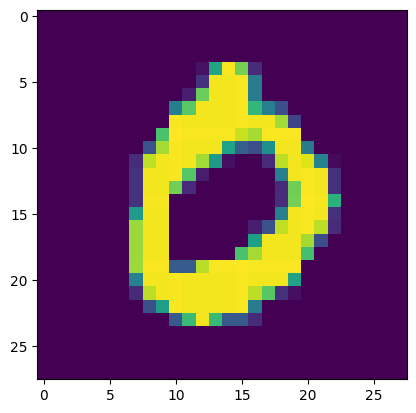

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction Probability : [[9.9984705e-01 1.4356777e-07 2.4489620e-05 2.6055877e-06 1.6115220e-06
  2.7387537e-06 1.0558958e-04 5.9088798e-06 9.6220003e-07 8.8444394e-06]]
The Answer is  [0]


In [16]:
n = 3
plt.imshow(x_test[n].reshape(28,28))
plt.show()

pred = model.predict(x_test[n].reshape(1,28,28,1))
answer = np.argmax(pred, axis =1)

print('Prediction Probability :', pred)
print('The Answer is ', answer)

In [17]:
#Functional API 활용해서 중간 컨볼루션 레이어의 Feature Map 결과값을 이미지로 보여주는 모델 생성중간 컨볼루션 레이어의 Feature Map 결과값을 이미지로 보여주는 모델 생성
#모델 레이아웃확인
model.summary() #3번째 컨볼루션레이어 확인

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,235,744 (4.71 MB)

 Trainable params: 411,914 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 823,830 (3.14 MB)

In [21]:
#Functional API 활용하여 중간의 컨볼루션 레이어의 Feature map 이미지 출력하는 모델 만들기
# 1개 입력 : model.input
# 2개 출력 : conv2d, conv2d_1 레이어 output

conv2d_layer = model.get_layer('conv2d')
conv2d_1_layer = model.get_layer('conv2d_1')

#Functional API 이용해서 새로운 conv_model 생성
#이미 레이어별로 학습되어 있어 그냥 가져와 사용하여 됨, 다시 학습 필요 없음
conv_model = tf.keras.models.Model(
    inputs =[model.input],
    outputs = [conv2d_layer.output, conv2d_1_layer.output]
)

In [22]:
#train데이터 1개를 입력하고 컨볼루션 2개의 Featuremap 예측하기

sample= x_train[0][tf.newaxis, ...] #1 * 28 * 28 * 1
featuremap = conv_model.predict(sample)
len(featuremap)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


2

In [23]:
#결과값은 리스트로 ㅗ디어 있게 2개 원소로 구성
type(featuremap)

list

In [24]:
#각 원소는 넘파이 어레이
type(featuremap[0])

numpy.ndarray

In [25]:
#첫 번쨰 컨볼루션 Feature Map 확인하기 : 32개 Feature map
conv_f1 = featuremap[0]
conv_f1.shape

(1, 28, 28, 32)

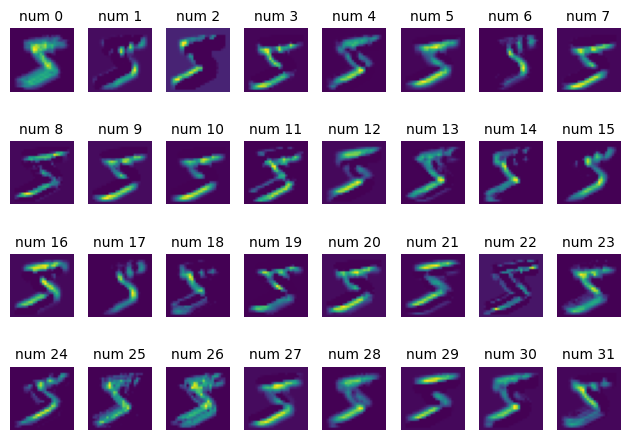

In [26]:
#첫번째 컨볼루션 32개의 feature map 결과값 이미지 보기
fig, axes = plt.subplots(4, 8)
for i in range(32):
  ax = axes[i//8, i%8]
  ax.imshow(conv_f1[0,:,:,i], cmap = 'viridis')
  ax.set_axis_off()
  ax.set_title(f'num {i}', fontsize = 10)

plt.tight_layout()
plt.show()

In [27]:
#두 번쨰 컨볼루션 feature map 확인하기 : 64개 feature map
conv_f2 = featuremap[1]
conv_f2.shape

(1, 14, 14, 64)

AttributeError: AxesImage.set() got an unexpected keyword argument 'cmp'

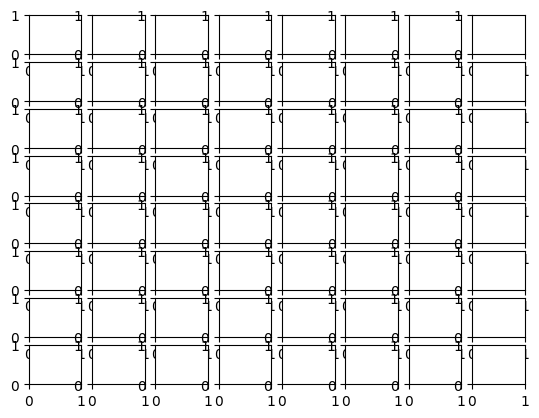

In [28]:
#두번쨰 컨볼루션 64개의 featuremap 결과값 이미지 보기
fig, axes = plt.subplots(8, 8)

for i in range(64):
  ax = axes[ i//8, i%8]
  ax.imshow(conv_f2[0,:,:,i], cmp='viridis')
  ax.set_axis_off()
  ax.set_title(f'num {i}', fontsize = 6)

# 배운 내용 정리
 - Functional API 이용해 CNN 만들기
 - 또한 기존 Sequential 모델로는 구성하기 어려운 여려개의 입력값과 , 여러 개의 출력을 구성할 수 있는 Functional API 이용해서 CNN 모델링을 진행함
 - 또한, 새로운 Functional API 모델을 만들어 ,CNN 모델의 Feature Map 이미지를 확인함
 - 반복 사용하여 익숙해질 것

#MNIST 이용하여 복잡한 토폴로지 CNN 모델링 만들기
 - 이 과정에서는 Functional API 이용하여 입력 1개 출력 2개가 되도록 CNN 모델링 진행함
 - 여러개의 입력과 출력이 되는 모델을 구성하려면 반드시 Functional API사용할 줄 알아야 함.
 <학습목차>
1. import modules
2. 데이터 불러오기 :Keras Dataset MNIST활용
3. y레이블을 보고 홀수/짝수 레이블 만들기
4. Functional API 이용하여 1개 입력 , 2개 출력 모델(숫자(0~9),홀수/짝수 예측)
5. 모델 컴파일
6. 학습 수행 :model.fit , EarlyStopping, ModelCheckpoint
7. 학습 결과 테스트 : model.evalutate
8. 성능 그래프
9. 실전 테스트 (손글씨 입력해 분류 잘하는지 보기)

In [29]:
# import modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [31]:
# Train 레이블 숫자를 보고 짝수(0), 홀수(1)로 나누기

y_train_odd = []
for y in y_train:
  if y % 2 == 0:
    y_train_odd.append(1)
  else:
    y_train_odd.append(0)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[0 1 1 0 0 1 0 0 0 1]


In [33]:
# Test 레이블의 숫자를 보고 짝수(0), 홀수(1) 로 나누기
y_test_odd = []
for y in y_test:
  if y %2 ==0:
    y_test_odd.append(0)
  else:
    y_test_odd.append(1)

y_test_odd = np.array(y_test_odd)
y_test_odd.shape

y_test_odd = np.array(y_test_odd)
y_test_odd.shape

(10000,)

In [34]:
#정규화 (Normalization)
x_train = x_train /255.0
x_test = x_test / 255.0

#채널 추가 : reshape, tf.newaxis, expand_dims 이용가능
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#Functional API ㅣ용하여 1개 입력, 2개 출력 모델 (숫자(0~9) 홀수/짝수 예측
- 입력1 :이미지 (28*28)
- 출력1 : 0~9까지 숫자 예측
- 출력2 : 각 숫자가 홀수인지 짝수인지 예측


In [35]:
#Functional API를 사용하여 모델 생성
#입력과 출력 레이어에 이름 붙여주기!
#입력 1개 : 이미지 (28*28)
#출력 2개
# 1) 홀짝 분류 : 이미지 > Flatten
# 2) 0~9 숫자 분류 : 이미지 > CNN > Flatten > concat (홀짝 Flatten + CNN Flatten) > DNN

#입력
inputs = tf.keras.layers.Input(shape = (28,28,1), name = 'inputs') #레이어에 이름을 지정 해 주면 접근하기가 좋다.

#컨볼루션
conv = tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', name = 'conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name ='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

#concat
flat_inputs = tf.keras.layers.Flatten(name = 'flatten_inputs')(inputs)
concat = tf.keras.layers.Concatenate(name = 'concat_layer')([flat, flat_inputs])

#출력
digit_outputs = tf.keras.layers.Dense(10, activation= 'softmax', name = 'digit_dense')(concat)
odd_even_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_Dense')(flat_inputs)

#모델링
model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_even_outputs])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 28, 28, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_layer        │ (None, 26, 26,    │        320 │ inputs[0][0]      │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool_layer       │ (None, 13, 13,    │          0 │ conv2d_layer[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_layer       │ (None, 5408)      │          0 │ maxpool_layer[0]… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_inputs      │ (None, 784)       │          0 │ inputs[0][0]      │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_layer        │ (None, 6192)      │          0 │ flatten_layer[0]… │
│ (Concatenate)       │                   │            │ flatten_inputs[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_dense (Dense) │ (None, 10)        │     61,930 │ concat_layer[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odd_Dense (Dense)   │ (None, 1)         │        785 │ flatten_inputs[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,035 (246.23 KB)

 Trainable params: 63,035 (246.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model.input)
print(model.output)

In [39]:
#tf.keras.utils.plot_model(model, show_shapes =True, show_layer_names =True, to_file ='muliti_output_cnn.png')


In [40]:
#모델 컴파일
#2개 출력값 가지므로 loss 도 2개 사용해야함
#loss_weight로 각 loss에 가중치 부여
model.compile(optimizer ='adam',
              loss={'digit_dense' : 'sparse_categorical_crossentropy', 'odd_dense': 'binary_corssentropy'},
              loss_weights = {'digit_dense': 1, 'odd_dense': 0.5}, #loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics = ['accuracy'])

In [41]:
#학습 수행 : 딕셔너리 형태로(y값 2개) {레이어이름 :데이터셋} 포맷으로 만들어 주어야 함
history = model.fit(x = {'inputs': x_train}, y ={'digit_dense': y_train, 'odd_dense': y_train_odd},
                    validation_data =({'inputs': x_test}, {'digit_dense': y_test,'odd_dense' :y_test_odd}),
                    epochs =10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: inputs
Received: inputs=['Tensor(shape=(32, 28, 28, 1))']
  warnings.warn(msg)


ValueError: Expected keys ListWrapper(['digit_dense', 'odd_Dense']) in loss dict, but found loss.keys()=['digit_dense', 'odd_dense']

In [ ]:
#학습결과 테스트
# 입력/출력: 딕셔너리 형태로 {레이아 이름: 에디터셋 } 포멧으로 주어야 함
model.evaluate({'inputs':x_test }, {'digit_dense': y_test, 'odd_dense': y_test_odd})

In [42]:
#성능 그래프
history.history.keys()
x_range = range(1, len(history.history['digit_dense_accuracy']) + 1)

KeyError: 'digit_dense_accuracy'

In [ ]:
#Accuracy 와 Loss 에 대한 2개의 subplot 그림
plt.figure(figsize = (10,6))
plt.subplot(221)
plt.plot(x_range, history.history['digit_dense_accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(x_range, history.history['val_digit_dense_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = 'loss')
plt.plot(x_range, history.history['val_loss'], color = 'blue', label = 'Validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

In [ ]:
#샘플 이미지 출력
import matplotlib.pylab as plt
def plot_inage(data, idx):
  plt.figure(figsize= (5,5))
  plt.imshow(np.sqeeze(data[idx]))
  plt.axis("off")
  plt.show()

plot_image(x_test, 0)

In [ ]:
digit_preds, odd_pres = model.predict(x_test)
print(digit_preds[0])
print(odd_preds[0])

In [ ]:
#tntwk 0~9 예측
digit_labels = np.argmax(digit_pres, axis =1)
digit_labels[1:10]
#홀짝예측 짝0홀1
odd_labels = (odd_preds > 0.5).astype('int32')
odd_labels[1:10]

#배운내용 정리
1. Functional API 이용해 1개의 입력값과 2개의 출력값을 가지는 CNN 모델 구성
2. 이를 통해서 Functional API 사용해 복잡한 토폴로지 형태의 모델 만듬
3. 특히, 여러개의 output 예측할경우, loss function 과 model fit학습시 주의해서 인자값들을 입력해야함